# Static scale: scaling relationships in data

In this chapter we build on the concept of orders of magnitude and observe so-called scaling relationships between different variables that concern us in ecological economics. For example, we have a more detailed look now on the relationship between GDP per capita and energy consumption per capita across countries. We have a look at the relationship between these two variables at one point in time - therefore, we call this "static scale" or "static scaling relationships". 

Here is an overview of you will learn in this chapter. 

You will learn how to:
- How to read interpret log-log plots
- understand the basics of a simple regression analysis also using log-log data
- Learn about power-laws and the concept of elasticity


## 1. Linear scatter plots and log–log plots


You already know what logarithms are and what orders of magnitude are. Now we will see these concepts in data-action. 

Below you see a typical log-log plot from ecological economics - the cross-country relationship between energy and GDP per capita.

First we have to load some real dataset. 

We will take data from here OurWorldinData here https://ourworldindata.org/grapher/energy-use-per-person-vs-gdp-per-capita. 

(COMMENT FOR WORK! PROBABLY NEED TO DO A SHAREPOINT HASH SOMEHOW)

Run the following code, do not worry if you do not understand everything just yet. 


In [2]:
## load data set csv

import pandas as pd

url = "https://raw.githubusercontent.com/yannickoswald/ecoeconbook/main/teaching_data_sets/data2_energygdp_owid2023.csv"
df = pd.read_csv(url, sep=";")
df.head()

,entity,code,year,energy_pc,gdp_pc,region
0,Afghanistan,AFG,2023,990.46967,1983.8126,Asia
1,Albania,ALB,2023,8032.07030,19487.7100,Europe
2,Algeria,DZA,2023,16994.37700,15159.3240,Africa
3,Angola,AGO,2023,2680.34160,8788.2610,Africa
4,Antigua and Barbuda,ATG,2023,32266.11300,28474.0450,North America


First we will plot the data on a linear scale. And what you should see after running this code is a cloud of data points that becomes wider with increasing axes values. This kind of plot is called a scatter plot - because it is "scattered" cloud of data points. You may read the comments in the next code window carefully, so that you understand how to use matplotlib for plotting.

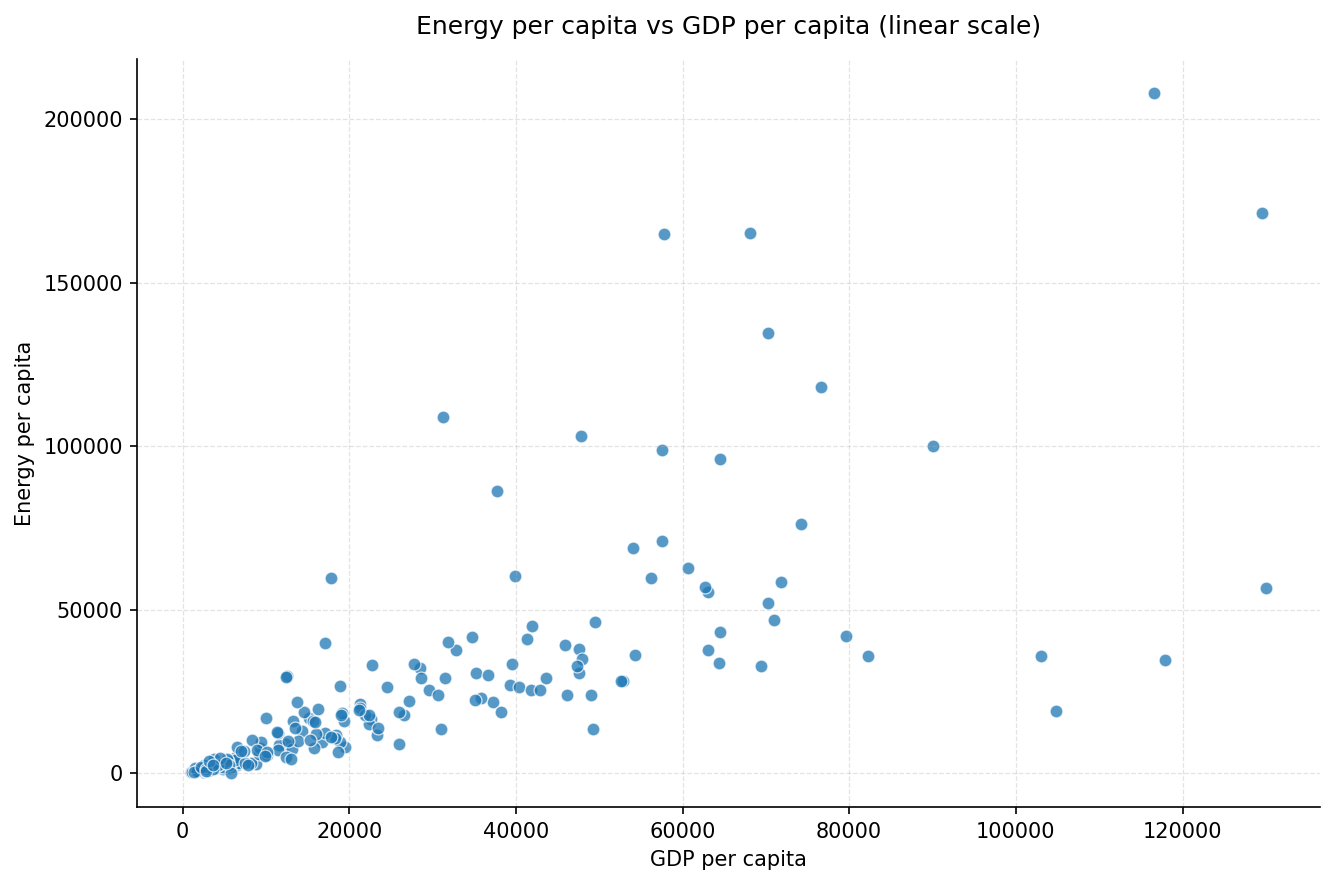

In [ ]:
# Import the pyplot module from the matplotlib library
# We alias it as 'plt' so we don't have to type 'matplotlib.pyplot' every time
import matplotlib.pyplot as plt

# Create the Figure (the window) and Axes (the plotting area)
# figsize=(9, 6): Width and height in inches
# dpi=150: High resolution (dots per inch) for a crisp, professional look
fig, ax = plt.subplots(figsize=(9, 6), dpi=150)

# Create the scatter plot
ax.scatter(
    df["gdp_pc"],       # X-axis data (GDP per capita)
    df["energy_pc"],    # Y-axis data (Energy per capita)
    s=38,               # 's' is the size of the markers (dots)
    alpha=0.75,         # Transparency (0 to 1). Helps visualize overlapping points
    edgecolors="white", # White border around dots helps separate them visually
    linewidths=0.6,     # Thickness of the white border
)

# Set the title and axis labels
# pad=12: Adds space between the title and the chart for better readability
ax.set_title("Energy per capita vs GDP per capita (linear scale)", pad=12)
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Energy per capita in kWh") # this is a different unit than we used before but we will get back to this later.

# Configure the background grid
# linestyle="--": Dashed lines are less intrusive than solid lines
# alpha=0.35: Low opacity makes the grid subtle so it doesn't compete with data
ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.35)

# Remove the top and right spines (borders)
# This is a common design choice to make the chart look cleaner and less "boxy"
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Adjust the layout to prevent labels from being cut off
plt.tight_layout()

# Render the plot to the screen
plt.show()

This is what log-log plots are good for. Because the data spans such large ranges it is difficult to visualise all of it on one scale, if we just consider the data values as they are. So let us log transform the values. 


Now to be exact we have two options here: 

1) We can just tell Python to use log-scale axes in the scatter plot or
2) we could log transform the data ourselves and then plot it. 

We take option number 1 because this relates better to what we learned so far in this unit. About log transforms of data, we will learn more later. 

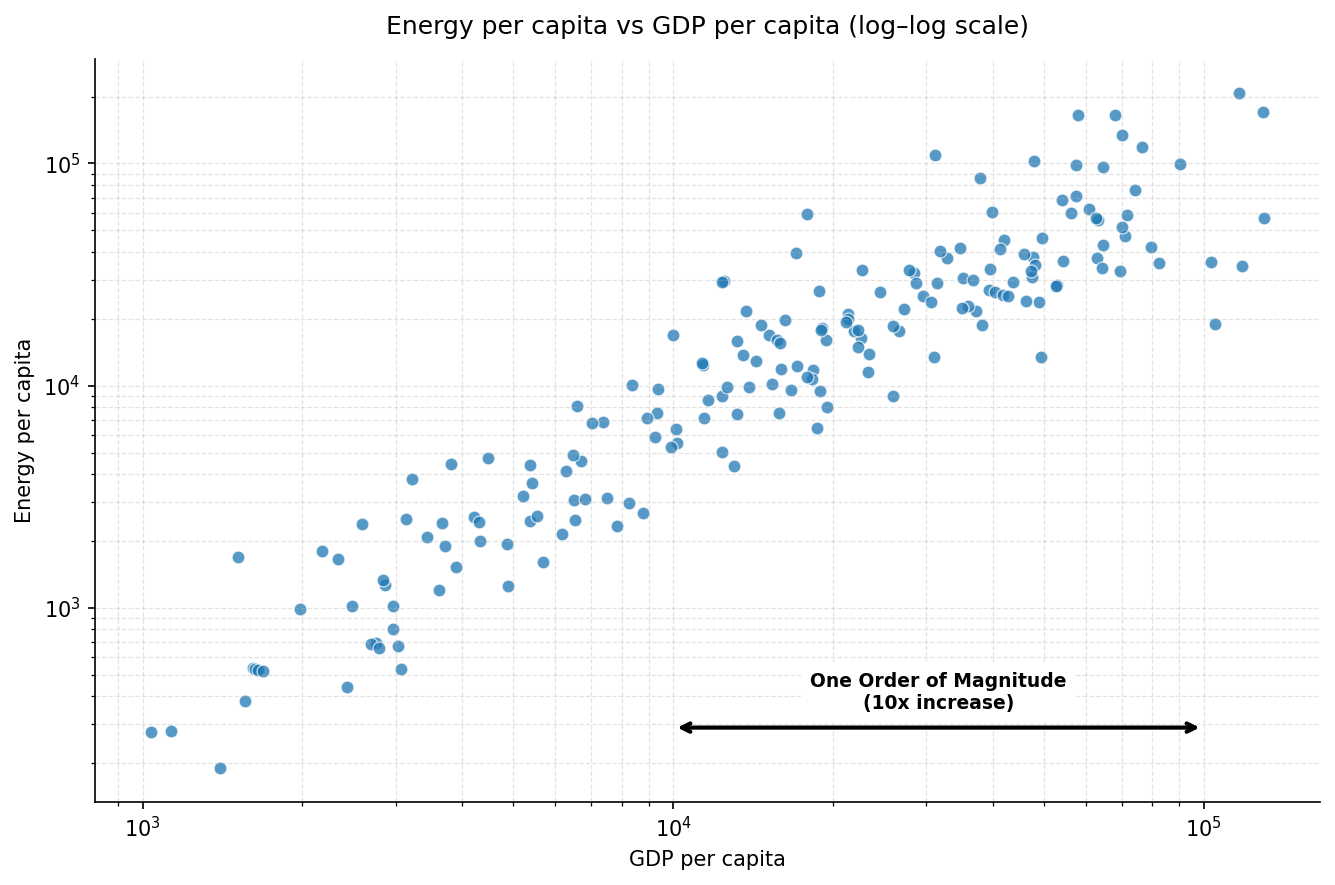

In [ ]:
import matplotlib.pyplot as plt
import numpy as np # Needed for the geometric mean calculation

# Plot (log–log scale)
# Create the Figure (the overall window) and Axes (the specific plot area)
# figsize=(9, 6): Sets the dimensions in inches (width, height)
# dpi=150: "Dots per inch" controls resolution. Higher dpi = sharper image
fig, ax = plt.subplots(figsize=(9, 6), dpi=150)

# Create a scatter plot on the Axes 'ax'
ax.scatter(
    df["gdp_pc"],       # X-axis data: GDP per capita column
    df["energy_pc"],    # Y-axis data: Energy per capita column
    s=38,               # Size of the dots (in points^2)
    alpha=0.75,         # Transparency: 0 is invisible, 1 is solid
    edgecolors="white", # Adds a white ring around each dot
    linewidths=0.6,     # The thickness of that white ring
)

# Change the axis scales to logarithmic
# Log scales are useful when data spans several orders of magnitude
ax.set_xscale("log")
ax.set_yscale("log")

# Set the chart title and axis labels
ax.set_title("Energy per capita vs GDP per capita (log–log scale)", pad=12)
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Energy per capita in kWh")

# configure the grid lines behind the data
ax.grid(True, which="both", linestyle="--", linewidth=0.6, alpha=0.35)

# Remove the top and right borders (spines) for a cleaner, modern look
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# -------------------------------------------------------------------------
# NEW: Add annotation to explain "Orders of Magnitude"
# -------------------------------------------------------------------------

# We need a "blended transform" to position the arrow.
# This allows us to define X using Data coordinates (10,000 to 100,000)
# but define Y using Axes coordinates (0.1, meaning 10% up the chart height).
# This ensures the arrow stays floating near the bottom regardless of the data range.
blend_transform = ax.get_xaxis_transform()

# 1. Draw the double-sided arrow
ax.annotate(
    "",                         # No text here, just the arrow
    xy=(10000, 0.1),            # Start at 10^4, 10% up the y-axis
    xytext=(100000, 0.1),       # End at 10^5, 10% up the y-axis
    xycoords=blend_transform,   # Use the mixed coordinates
    textcoords=blend_transform,
    arrowprops=dict(arrowstyle="<->", linewidth=2, color="black") # Thick, double-headed
)

# 2. Add the text label
# note: On a log scale, the visual center is the Geometric Mean, not the average.
# sqrt(10^4 * 10^5) = 10^4.5 ≈ 31622
visual_center = np.sqrt(10000 * 100000)

ax.text(
    visual_center,              # X: The visual middle of the arrow
    0.12,                       # Y: Slightly above the arrow (12% up)
    "One Order of Magnitude\n(10x increase)",
    transform=blend_transform,  # Use the same mixed coordinates
    ha="center",                # Horizontal align: Center
    va="bottom",                # Vertical align: Bottom
    fontsize=9,
    fontweight='bold',
    backgroundcolor="white"     # White background to make text readable over gridlines
)

# -------------------------------------------------------------------------

# Automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.tight_layout()

# Actually display the window containing the plot
plt.show()

This also teaches you already one of the most important things to know about as a scientist: Different data visualizations may have different strengths but also weaknesses. Of course you can observe that there is a clearly a systematic relationship between the two variables national income (GDP per capita) and energy use. And you also already understand that one order of magnitude in income translates roughly to one order of magnitude increase in energy. 


Next we will fit our first statistical model, a linear regression to this data. Do not worry about all the statistical details relating to this topic for now - we will cover it in more detail in a subsequent chapter. 

## 2. The intuition of linear Regression

At its simplest, **Linear Regression** is just a method for finding the  best-fitting straight line through a cloud of data points.

In this section, we will ignore statistical theory (distributions, error terms, etc.) and focus on a simple first understanding. We simply want to understand how to describe the relationship between GDP and Energy.

---

### A. The Linear Model (Linear Scale)

On a standard plot, as the first plot above (linear $x$, linear $y$), a straight line is defined by the equation you likely learned in high school algebra:

$$y = mx + c$$

In data science and economics, we usually write this using betas ($\beta$), but the meaning is identical:

$$y = \beta_1x + \beta_0$$

Where:
* **$y$ (Dependent Variable):** The thing we want to predict (e.g., Energy per capita).
* **$x$ (Independent Variable):** The thing we are using to predict (e.g., GDP per capita).
* **$\beta_0$ (Intercept):** Where the line crosses the y-axis (when $x=0$).
* **$\beta_1$ (Slope):** How steep the line is.

The slope tells us about Change:
> "If GDP ($x$) increases by **1 unit** (e.g., $1 USD), Energy ($y$) increases by **$\beta_1$ units**."


Next, we first a model like this through the linearly organized data above. For this, without understanding how it actually works, we just use the numpy package and the function np.polyfit(x, y, 1). Note there are several packages and functions that you could do this with. You could even write your own. And we will do so in a later chapter.

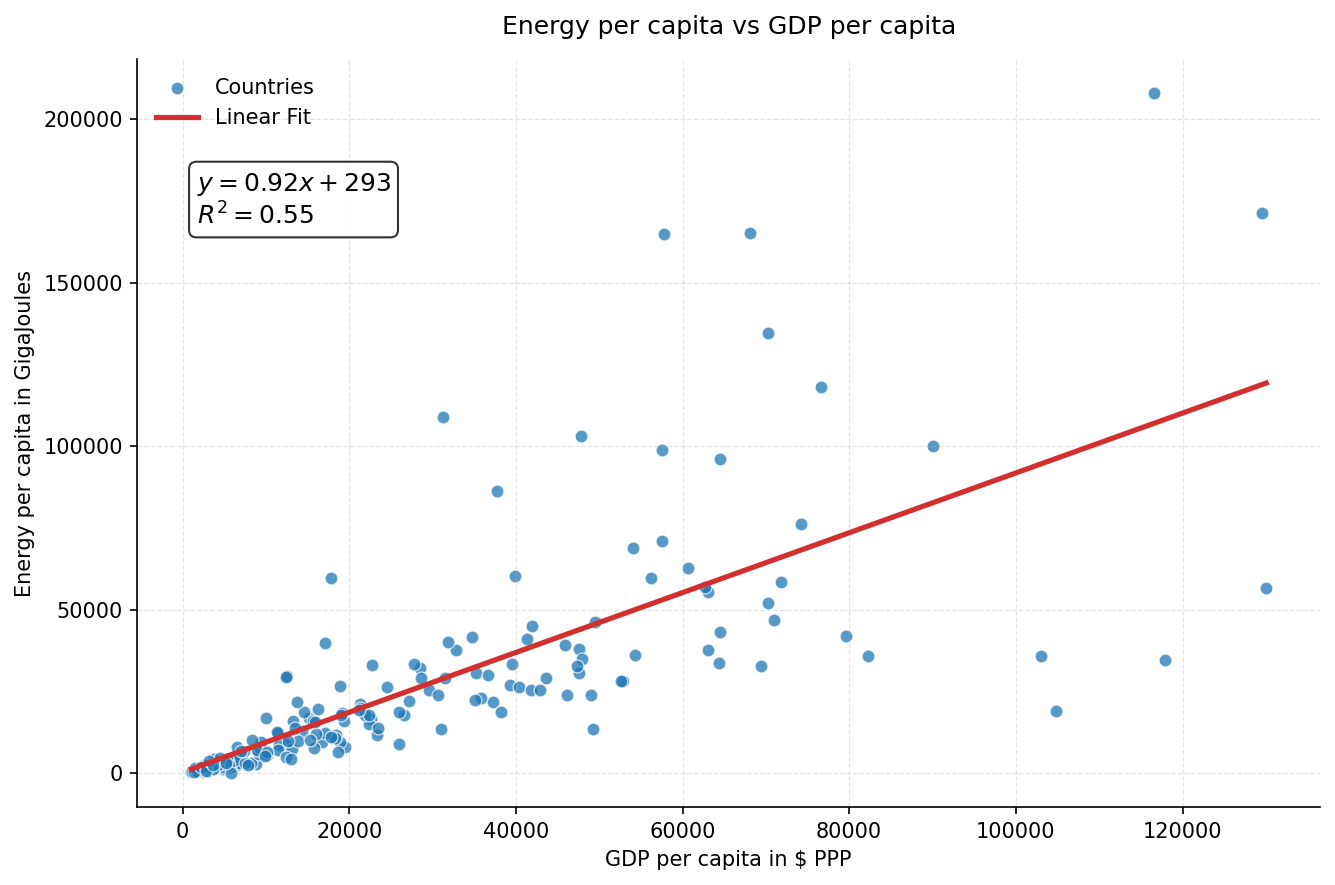

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Setup the figure
fig, ax = plt.subplots(figsize=(9, 6), dpi=150)

# 1. Plot the Data (Scatter)
ax.scatter(
    df["gdp_pc"],
    df["energy_pc"],
    s=38,
    alpha=0.75,
    edgecolors="white",
    linewidths=0.6,
    label="Countries" # Added label for the legend
)

# 2. Calculate and Plot the Linear Regression Line
# Remove NaNs first to avoid errors in calculation
valid_data = df.dropna(subset=["gdp_pc", "energy_pc"])
x = valid_data["gdp_pc"]
y = valid_data["energy_pc"]

# Fit a 1st degree polynomial (straight line): y = mx + b
m, b = np.polyfit(x, y, 1)

# Create a smooth range of X values for plotting the line
x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + b

# Calculate R-squared (r^2 is simply the square of the correlation coefficient)
correlation = np.corrcoef(x, y)[0, 1]
r_squared = correlation**2

# Plot the red regression line
ax.plot(x_line, y_line, color="#D32F2F", linewidth=2.5, label=f"Linear Fit")

# 3. Aesthetics
ax.set_title("Energy per capita vs GDP per capita", pad=12)
ax.set_xlabel("GDP per capita in $ PPP")
ax.set_ylabel("Energy per capita in GigaJoules")

ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.35)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add the Equation and R^2 as a text box
text_str = f'$y = {m:.2f}x + {b:.0f}$\n$R^2 = {r_squared:.2f}$'
ax.text(0.05, 0.85, text_str, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add the legend (frameon=False makes it look cleaner/transparent)
ax.legend(frameon=False, loc="upper left")

plt.tight_layout()
plt.show()

Now the important part here is the interpretation. In our case, $\beta_1$ is equal to 0.92 and $\beta_0$ to round about 300. what this means is as follows: 

1) Energy use and GDP are almost 1-to-1 proportional to each other. One unit of GDP per capita increase is, given statistical averaging across countries, correlated with one unit of energy increase. However, this relationship holds for these specific units (GDP per capita in international dollar and Gigajoule per capita). It is not a fundamental law of nature that 1 dollar = 1 unit of energy; it's a statistical coincidence of the units we chose.
2) Also the poorest countries use some energy, and by around 300 units more than what would be expected only from the $\beta_1$ term. It is a constant base level of energy that is estimated to exist independent on the GDP part. However also here is some caution for understanding necessary - The model predicts a base level, even though no country actually has zero GDP. If we would set x to 0 and claim a country with 0 dollars of income would have a 

What this does not mean is equally, or even more important. 

1) Income increases *cause* energy use. Or the other way around. It is very likely that the two quantities are related through how economies grow and behave, but we cannot infer from this correlation, which is quantified as the regression model, that always one unit of GDP increase causes one unit of energy increase. 

Now, previously in the intro to Python chapters we have made use of an energy unit called Gigajoule. But the graphs above are using kWh. First, it is important to become acquainted with different units being used, but this is also didactically so on purpose. 


Let us see what happens to the regression analysis above, if we change the unit of energy. Let us first convert Kilowatt-hours to Gigajoules and add a new column for this to the dataframe. 

In [6]:
# Create a new column 'energy_pc_gj' by converting kWh to Gigajoules
# Conversion factor: 1 kWh = 0.0036 GJ
df["energy_pc_gj"] = df["energy_pc"] * 0.0036

# Check the first few rows to see the result
df.head()

,entity,code,year,energy_pc,gdp_pc,region,energy_pc_gj
0,Afghanistan,AFG,2023,990.46967,1983.8126,Asia,3.565691
1,Albania,ALB,2023,8032.07030,19487.7100,Europe,28.915453
2,Algeria,DZA,2023,16994.37700,15159.3240,Africa,61.179757
3,Angola,AGO,2023,2680.34160,8788.2610,Africa,9.649230
4,Antigua and Barbuda,ATG,2023,32266.11300,28474.0450,North America,116.158007


Now let us redo the plotting exercise. Below you see the plot (this time with the code hidden)

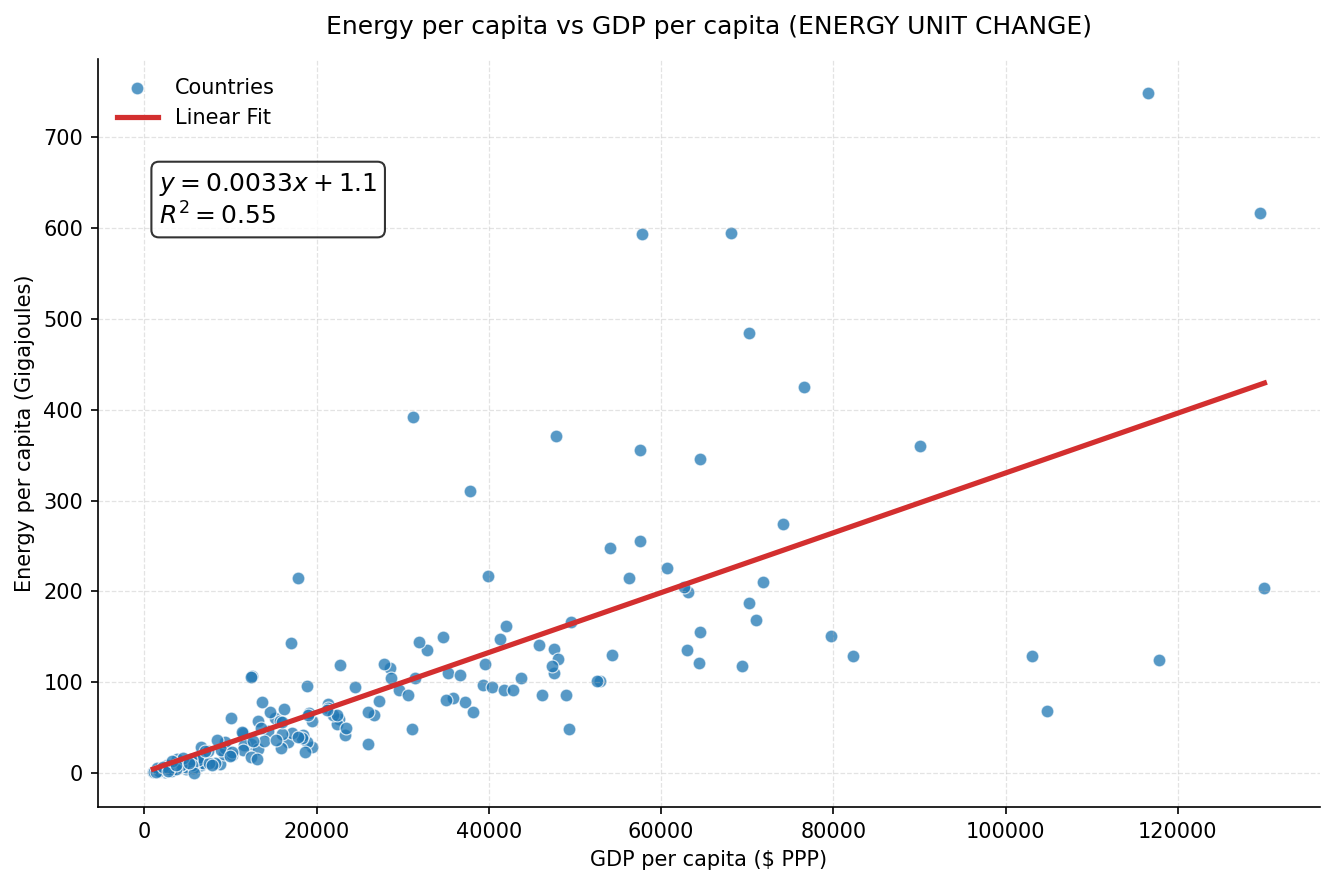

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Setup the figure
fig, ax = plt.subplots(figsize=(9, 6), dpi=150)

# 1. Plot the Data (Scatter)
# Note: We are now using the new 'energy_pc_gj' column
ax.scatter(
    df["gdp_pc"],
    df["energy_pc_gj"], # Changed from energy_pc
    s=38,
    alpha=0.75,
    edgecolors="white",
    linewidths=0.6,
    label="Countries"
)

# 2. Calculate and Plot the Linear Regression Line
# Remove NaNs first to avoid errors in calculation
# We must drop NaNs from the NEW column now
valid_data = df.dropna(subset=["gdp_pc", "energy_pc_gj"])
x = valid_data["gdp_pc"]
y = valid_data["energy_pc_gj"] # Changed from energy_pc

# Fit a 1st degree polynomial (straight line): y = mx + b
m, b = np.polyfit(x, y, 1)

# Create a smooth range of X values for plotting the line
x_line = np.linspace(x.min(), x.max(), 100)
y_line = m * x_line + b

# Calculate R-squared
correlation = np.corrcoef(x, y)[0, 1]
r_squared = correlation**2

# Plot the red regression line
ax.plot(x_line, y_line, color="#D32F2F", linewidth=2.5, label="Linear Fit")

# 3. Aesthetics
ax.set_title("Energy per capita vs GDP per capita (ENERGY UNIT CHANGE)", pad=12)
ax.set_xlabel("GDP per capita ($ PPP)")
ax.set_ylabel("Energy per capita (Gigajoules)") # Updated Label

ax.grid(True, linestyle="--", linewidth=0.6, alpha=0.35)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add the Equation and R^2 as a text box
# Formatting: m is now much smaller (approx 0.0033), so we need more decimal places
text_str = f'$y = {m:.4f}x + {b:.1f}$\n$R^2 = {r_squared:.2f}$'
ax.text(0.05, 0.85, text_str, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add the legend
ax.legend(frameon=False, loc="upper left")

plt.tight_layout()
plt.show()

We just converted our energy data from kWh to Gigajoules (multiplying by 0.0036).You might notice that the regression line looks exactly the same, but the numbers defining it are different.A. What Changes? (The Coefficients)The coefficients ($\beta_0$ and $\beta_1$) are Unit-Dependent. They are like price tags—if you change the currency, the number changes, even if the value of the item is the same.The Slope ($\beta_1$):Old Slope: ~0.92 (kWh per Dollar)New Slope: ~0.0033 (GJ per Dollar)Why? Since a Gigajoule is a much "larger" unit than a kWh, we need fewer of them to describe the same increase.The Math: $0.92 \times 0.0036 \approx 0.0033$. The slope scaled exactly by our conversion factor.The Intercept ($\beta_0$):Old Intercept: ~300 (kWh)New Intercept: ~1.1 (GJ)Why? The "base level" of energy is still the same physical amount of heat/electricity, just expressed in a different language.B. What is Invariant? (The Quality of the Model)Some things never change, no matter what units you use (Joules, BTUs, Calories, or kWh). These are the "invariants."The $R^2$ (Goodness of Fit):Look at the plot: The points are scattered around the line in exactly the same pattern.$R^2$ measures how well the line fits the data relative to the variance. Changing the units scales the variance and the error by the same amount, so they cancel out.Lesson: You cannot "cheat" and get a better $R^2$ just by changing units (e.g., measuring GDP in cents instead of dollars).The Correlation ($r$):The strength of the relationship is identical. If GDP and Energy are strongly linked in kWh, they are equally strongly linked in Gigajoules.Statistical Significance (P-values):If the relationship was statistically significant before, it is still significant now. The t-statistic remains the same because both the coefficient and its standard error scale by the same factor.